# Author - V S Hariharan 

# Solid solution strength

In [1]:
import math

In [2]:
# Coefficients for Solid solution strength
beta_Al=225
beta_Co=39.4
beta_Cr=337
beta_Mo=1015
beta_Ti=775

In [3]:
# Composition of the alloy in atom fraction - As built
c_Al=3.2155E-02
c_Co=9.8145E-02
c_Cr=2.2248E-01
c_Mo=5.1244E-02
c_Ti=2.5368E-02

$$\sigma_{ss}=(1-f)(\sum_{i} (\beta_i c_i^{1/2})^{2})^{1/2}$$

for as-built, we take $f$ as 0 and for aged it is 0.17, calculated from Thermo-Calc

In [4]:
f=0.17

In [5]:
# Composition of gamma matrix obtained from Thermo-Calc Eqm calculation at 788 C
c_age_Al=1.56810E-02
c_age_Co=1.11295E-01
c_age_Cr=2.65970E-01
c_age_Mo=6.15777E-02
c_age_Ti=4.46602E-03

In [6]:
alist=[beta_Al,beta_Co,beta_Cr,beta_Mo,beta_Ti]
clist=[c_Al,c_Co,c_Cr,c_Mo,c_Ti]
c_age_list=clist=[c_age_Al,c_age_Co,c_age_Cr,c_age_Mo,c_age_Ti]

temp=0
temp_age=0
for i in range(len(alist)):
    temp = temp + (alist[i]*alist[i]*clist[i])
    temp_age = temp_age + (alist[i]*alist[i]*c_age_list[i])

In [7]:
y_ss = math.sqrt(temp)
y_age_ss=(1-f)*math.sqrt(temp_age)
print(y_ss)
print(y_age_ss)

311.91963180633564
258.8932943992586


# Grain Boundary strengthening

$$\sigma_D = \kappa D^{-1/2} $$

In [8]:
kappa=370 #MPa/sqrt(mu m)

In [9]:
# equivalent circle diameter (from EBSD) in microns
d_67=25
d_90=29
d_137=24

In [10]:
y_d_67= kappa*(d_67**-0.5) 
y_d_90= kappa*(d_90**-0.5)
y_d_137= kappa*(d_137**-0.5)

print(y_d_67)
print(y_d_90)
print(y_d_137)

74.0
68.70727512550918
75.52593373581466


# Dislocation Strengthening

$$\sigma_{\rho} = M\alpha b G \sqrt{\rho}$$

In [11]:
# Dislocation Density obtained from EBSD data
rho_67=3.2e+14
rho_90=3.1e+14
rho_137=4.6e+14

In [12]:
M=2.2 #Obtained from EBSD
G=82 #GPa
b=0.248 #nm
alpha=0.3

In [13]:
y_rho_67=M*alpha*G*b*math.sqrt(rho_67)*1e-6 #Convert N/m2 to MPa
y_rho_90=M*alpha*G*b*math.sqrt(rho_90)*1e-6 #Convert N/m2 to MPa
y_rho_137=M*alpha*G*b*math.sqrt(rho_137)*1e-6 #Convert N/m2 to MPa

In [14]:
print(y_rho_67)
print(y_rho_90)
print(y_rho_137)

240.0957419015006
236.31447028114044
287.8646819060928


# Precipitation Strengthening

$$\sigma_p = \frac{M\gamma_{APB}}{2b}\frac{l}{\Lambda + d} $$

\

$$l= d , \text{if} \quad d<d_m \\ l= (d^2 - (d-d_m)^2)^{1/2} , \text{if} \quad  d \geq d_{m} $$

\

$$d_m = \frac{\mu b^2}{\gamma_{APB}}$$

\

$$\Lambda = \text{max}\{\lambda, L-l\}$$

\

$$\lambda=L(\frac{2T}{d\gamma_{APB}})^{1/2}$$

\

$$T=0.5\mu b^2$$

\

$$L=d(\frac{\pi}{6f})^{1/2}$$

In [15]:
mu=82 #GPa
b=0.248 #nm
gamma=0.28 #J/m2
d=26 #nm

In [16]:
dm=mu*b*b/gamma

In [17]:
if d<dm:
    l=d
else:
    l=math.sqrt((d*d)-(d-dm)**2)

In [18]:
T=0.5*mu*b*b*1e-9 #N/m

In [19]:
L=d*math.sqrt(math.pi/(6*f))

In [20]:
lamda=L*math.sqrt(2*T/(1e-9*d*gamma))

In [21]:
LL=max(L-l,L)

In [22]:
y_p=1e3*M*gamma*l/(2*b*(LL+d)) #converts to MPa
print(y_p)

428.9914702429991


# Total Yield Strength - Add all the contributions

In [23]:
# For As-built
y_67= y_ss+y_d_67+y_rho_67
y_90= y_ss+y_d_90+y_rho_90
y_137= y_ss+y_d_137+y_rho_137

In [24]:
print(y_67)
print(y_90)
print(y_137)

626.0153737078363
616.9413772129852
675.3102474482431


In [25]:
aged_67= y_age_ss+y_d_67+y_rho_67+y_p
aged_90= y_age_ss+y_d_90+y_rho_90+y_p
aged_137= y_age_ss+y_d_137+y_rho_137+y_p

In [26]:
print(aged_67)
print(aged_90)
print(aged_137)

1001.9805065437583
992.9065100489074
1051.2753802841653


In [27]:
#Relative Error Percentage
y_exp=[654,674,656,1001,1010,986]
y_pred=[y_67,y_90,y_137,aged_67,aged_90,aged_137]

for i in range(len(y_exp)):
    print(100*(y_exp[i]-y_pred[i])/y_exp[i])

4.278994845896596
8.465671036649077
-2.9436352817443754
-0.09795270167415965
1.6924247476329286
-6.620221124154695


In [28]:
import matplotlib.pyplot as plt

In [29]:
# X axis
x=[1,2,3,4,5,6]
xlist=['67$^\circ$ As-built','90$^\circ$ As-built','137$^\circ$ As-built','67$^\circ$ Aged','90$^\circ$ Aged','137$^\circ$ Aged']

In [30]:
# Y-axis
ys=[654,674,656,1001,1010,986]
pred=[y_67,y_90,y_137,aged_67,aged_90,aged_137]

In [31]:
ys_err=[37,3,13,18,28,28]

In [32]:
# Template for paper quality figures
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.1
plt.rcParams['axes.labelpad'] = 4.0
plot_color_cycle = plt.cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
plt.rcParams['axes.prop_cycle'] = plot_color_cycle
plt.rcParams.update({"figure.figsize" : (10.0,5.0),
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})

In [33]:
pred

[626.0153737078363,
 616.9413772129852,
 675.3102474482431,
 1001.9805065437583,
 992.9065100489074,
 1051.2753802841653]

Text(0, 0.5, 'Yield Strength (MPa)')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


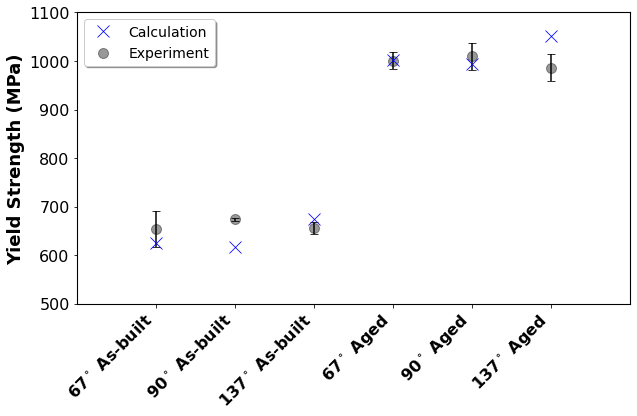

In [34]:
plt.scatter(x,ys,label="Experiment",alpha=0.4,marker="o",linestyle="None")
plt.errorbar(x,ys,yerr=ys_err,capsize=4,linestyle="None")
plt.plot(x,pred,"bx",label="Calculation",markersize=12)
plt.xticks(x,xlist,rotation=45,ha="right",fontweight="bold")
plt.legend(loc='upper left',
          ncol=1, fancybox=True, shadow=True,fontsize=14)
plt.ylabel("Yield Strength (MPa)",fontsize=18,fontweight="bold")
plt.savefig("mech_prop_prediction.jpg",bbox_inches='tight',dpi=400)